In [47]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
df = pd.read_csv('dataframe.csv')

In [49]:
df

,Unnamed: 0,tweetid,user_statuses_count,user_friends_count,user_followers_count,user_account_age,favorite_count,retweet_count,week,class
0,0,1401948148004687873,51125,439,6839,11.164384,3,0,1,0
1,1,1401947685964468230,5133,917,69500,12.246575,5,2,1,1
2,2,1401946752652021762,2039,456,1653,0.147945,10,0,1,0
3,3,1401946734373318657,8082,452,1068,8.520548,8,5,1,1
4,4,1401946551921041412,132631,3856,8945,8.016438,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...
7495,2495,1412176145915813892,74041,508,249,0.509589,0,27,3,1
7496,2496,1412176133592961024,6619,1838,998,9.230137,0,3,3,1
7497,2497,1412176071919771652,349,2,1,1.909589,0,0,3,0
7498,2498,1412176049312501760,8203,2760,2239,7.630137,108,0,3,0


In [50]:
df=df.drop("Unnamed: 0",axis=1)

In [51]:
df.iloc[0:,0:9]

,tweetid,user_statuses_count,user_friends_count,user_followers_count,user_account_age,favorite_count,retweet_count,week,class
0,1401948148004687873,51125,439,6839,11.164384,3,0,1,0
1,1401947685964468230,5133,917,69500,12.246575,5,2,1,1
2,1401946752652021762,2039,456,1653,0.147945,10,0,1,0
3,1401946734373318657,8082,452,1068,8.520548,8,5,1,1
4,1401946551921041412,132631,3856,8945,8.016438,3,3,1,1
...,...,...,...,...,...,...,...,...,...
7495,1412176145915813892,74041,508,249,0.509589,0,27,3,1
7496,1412176133592961024,6619,1838,998,9.230137,0,3,3,1
7497,1412176071919771652,349,2,1,1.909589,0,0,3,0
7498,1412176049312501760,8203,2760,2239,7.630137,108,0,3,0


In [60]:
X = df.iloc[0:,1:8]
y = df.iloc[:,-1]

In [89]:
y[2]

0

In [92]:
cl0=0
cl1=0
cl2=0
cl3=0
for i in range(len(y)):
        if y[i]==0:
            cl0=cl0+1
        elif y[i]==1:
            cl1=cl1+1
        elif y[i]==2:
            cl2=cl2+1
        elif y[i]==3:
            cl3=cl3+1

In [95]:
print('Class 0 =',cl0,'Class 1 =',cl1,'Class 2 =',cl2,'Class 3 =',cl3)

Class 0 = 3315 Class 1 = 3054 Class 2 = 629 Class 3 = 502


[0.08950573 0.07840443 0.0731687  0.06065326 0.05341593 0.62092804
 0.02392391]


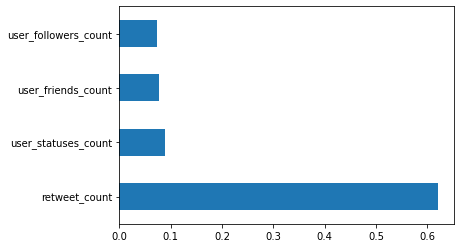

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 0)

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [67]:
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.7844444444444445


In [68]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81      1034
           1       0.95      0.49      0.65       900
           2       0.91      0.96      0.94       179
           3       0.98      0.99      0.99       137

    accuracy                           0.78      2250
   macro avg       0.88      0.86      0.85      2250
weighted avg       0.83      0.78      0.77      2250



In [69]:
print(confusion_matrix(y_test,
                       gnb_predictions))

[[1014   20    0    0]
 [ 442  443   15    0]
 [   0    4  172    3]
 [   0    0    1  136]]


In [70]:
print("Original class: ", Counter(y_train))

Original class:  Counter({0: 2281, 1: 2154, 2: 450, 3: 365})


In [71]:

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [72]:
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [73]:

print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({1: 2154, 2: 450, 0: 365, 3: 365})


In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_under, y_train_under)
gnb_predictions = gnb.predict(X_test)

In [75]:

print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1034
           1       0.94      0.53      0.68       900
           2       0.91      0.96      0.94       179
           3       0.98      0.99      0.99       137

    accuracy                           0.80      2250
   macro avg       0.89      0.86      0.86      2250
weighted avg       0.84      0.80      0.78      2250



In [76]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({3: 2281, 0: 2281, 1: 2281, 2: 2281})


In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_SMOTE, y_train_SMOTE)
gnb_predictions = gnb.predict(X_test)

In [79]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81      1034
           1       0.95      0.47      0.63       900
           2       0.85      0.98      0.91       179
           3       0.96      0.99      0.97       137

    accuracy                           0.78      2250
   macro avg       0.86      0.86      0.83      2250
weighted avg       0.83      0.78      0.76      2250



In [96]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
print("After oversampling: ",Counter(y_train_under))

After oversampling:  Counter({0: 365, 1: 365, 2: 365, 3: 365})


In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_under, y_train_under)
gnb_predictions = gnb.predict(X_test)

In [84]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      1034
           1       0.91      0.54      0.67       900
           2       0.83      0.98      0.90       179
           3       0.86      0.99      0.92       137

    accuracy                           0.79      2250
   macro avg       0.83      0.86      0.83      2250
weighted avg       0.82      0.79      0.78      2250



In [24]:
import matplotlib.pyplot as plt
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title('test')
    plt.xlabel('value')
    plt.ylabel('freq')
    plt.show()

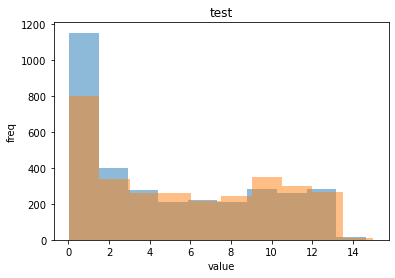

In [25]:
plot_histogram_dv(X['user_account_age'],y)